In [13]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
data = pd.read_csv("/Users/syedaskari/MSDC!/Machine Learing/MachineLearning/Datasets/gene_expression.csv")
data

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


<AxesSubplot: xlabel='Gene One', ylabel='Gene Two'>

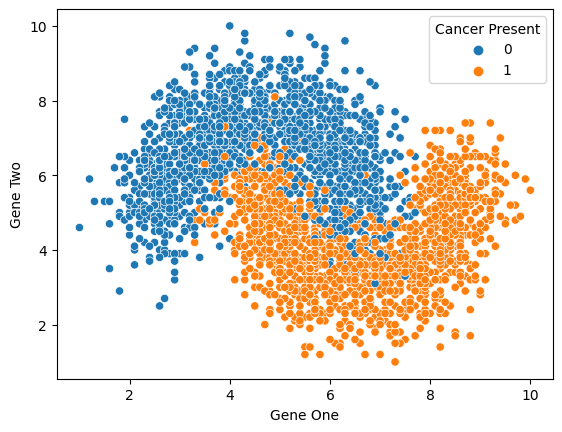

In [59]:
sns.scatterplot(data=data,x='Gene One', y='Gene Two', hue='Cancer Present')

(6.0, 2.0)

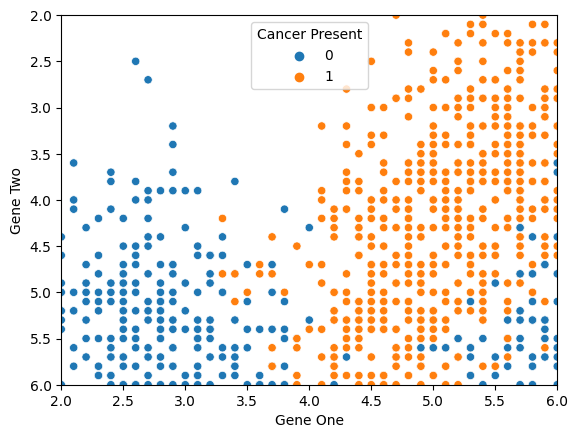

In [60]:
sns.scatterplot(data=data,x='Gene One', y='Gene Two', hue='Cancer Present')
plt.xlim(2,6)
plt.ylim(6,2)

## perform feature Engineering

In [61]:
#missing coluns
missing_columns=[feature for feature in data.columns if data[feature].isnull().sum()>1]
missing_columns

[]

as there are no missing row let us procede with 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
scaler=StandardScaler()

In [64]:

X=data.drop('Cancer Present', axis=1)
y=data['Cancer Present']

In [65]:
X

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


In [66]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.1, random_state=101)

In [67]:
scaled_X_train=scaler.fit_transform(X_train)

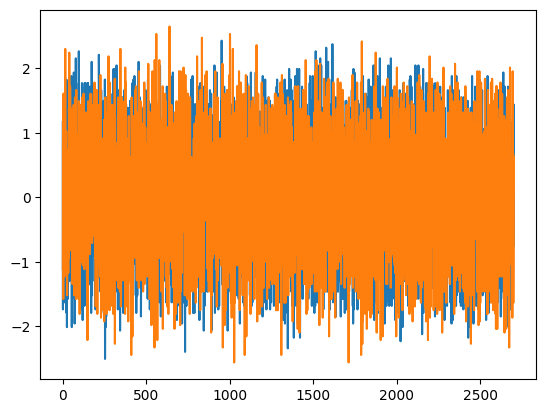

In [51]:
plt.plot(scaled_x_train)

In [68]:
scaled_X_test=scaler.transform(X_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [55]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [71]:
knn_mode= knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [75]:
y_pred=knn_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
confusion_matrix(y_test, y_pred)

array([[118,  18],
       [ 14, 150]])

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       136
           1       0.89      0.91      0.90       164

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



#### Choose the value of K in KNN

* elbow method
* Cross Validation

In [86]:
from sklearn.metrics import accuracy_score
## elbow method
test_error_rates=[]
for k in range(1,29):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred=knn_model.predict(scaled_X_test)
    test_error = 1-accuracy_score(y_test, y_pred)
    test_error_rates.append(test_error)
test_error_rates


[0.10666666666666669,
 0.11333333333333329,
 0.08666666666666667,
 0.09333333333333338,
 0.07999999999999996,
 0.07999999999999996,
 0.08333333333333337,
 0.07666666666666666,
 0.08333333333333337,
 0.08333333333333337,
 0.08333333333333337,
 0.09333333333333338,
 0.08333333333333337,
 0.08666666666666667,
 0.07999999999999996,
 0.07999999999999996,
 0.06999999999999995,
 0.07999999999999996,
 0.06999999999999995,
 0.07666666666666666,
 0.07333333333333336,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333336,
 0.07333333333333336,
 0.06999999999999995,
 0.07333333333333336]

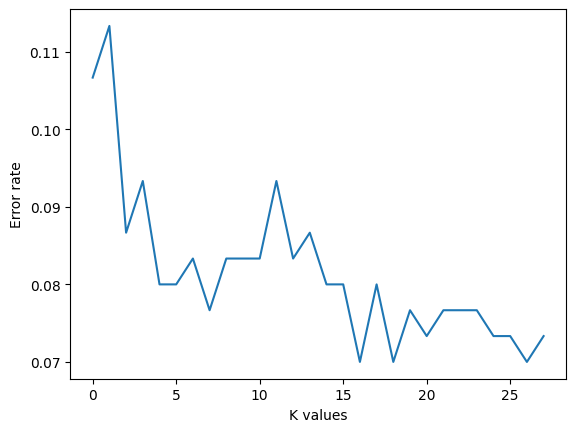

In [92]:
plt.plot(test_error_rates)
plt.ylabel('Error rate')
plt.xlabel('K values')
plt.show()

we can conclude that the above for the value of seven there is least error but not breaking

In [94]:
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [96]:
## pipeline -----> GridSearchCV


operations=[('scaler', scaler),('knn',knn_model)]
from sklearn.pipeline import Pipeline

In [98]:
pipe=Pipeline(operations)

In [100]:
from sklearn.model_selection import GridSearchCV
k_values=list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [112]:

param_grid = {'knn__n_neighbors':k_values,'knn__metric':['euclidean']}

In [113]:

full_cv_classifier=GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [114]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=28))]),
             param_grid={'knn__metric': ['euclidean'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [117]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=7))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='euclidean', n_neighbors=7),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'euclidean',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 7,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [119]:
full_pred = full_cv_classifier.predict(X_test)

In [120]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       136
           1       0.93      0.92      0.92       164

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

